LOGISTIC REGRESSION COMPREHENSIVE ANALYSIS

1. TRAINING DEFAULT LOGISTIC REGRESSION...
✓ Default Model Completed

2. TRAINING BALANCED LOGISTIC REGRESSION...
✓ Balanced Model Completed

3. PERFORMING HYPERPARAMETER TUNING...
✓ Hyperparameter Tuning Completed

MODEL COMPARISON RESULTS

  DEFAULT Logistic Regression:
   Accuracy:  0.7705
   F1 Score:  0.6182
   Precision: 0.7907
   Recall:    0.5075
   AUC:       0.8692
   Confusion Matrix:
[[214  18]
 [ 66  68]]

  BALANCED Logistic Regression:
   Accuracy:  0.7732
   F1 Score:  0.6982
   Precision: 0.6809
   Recall:    0.7164
   AUC:       0.8693
   Confusion Matrix:
[[187  45]
 [ 38  96]]

  TUNED Logistic Regression:
   Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
   Accuracy:  0.7814
   F1 Score:  0.7122
   Precision: 0.6875
   Recall:    0.7388
   AUC:       0.8708
   Confusion Matrix:
[[187  45]
 [ 35  99]]

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
              

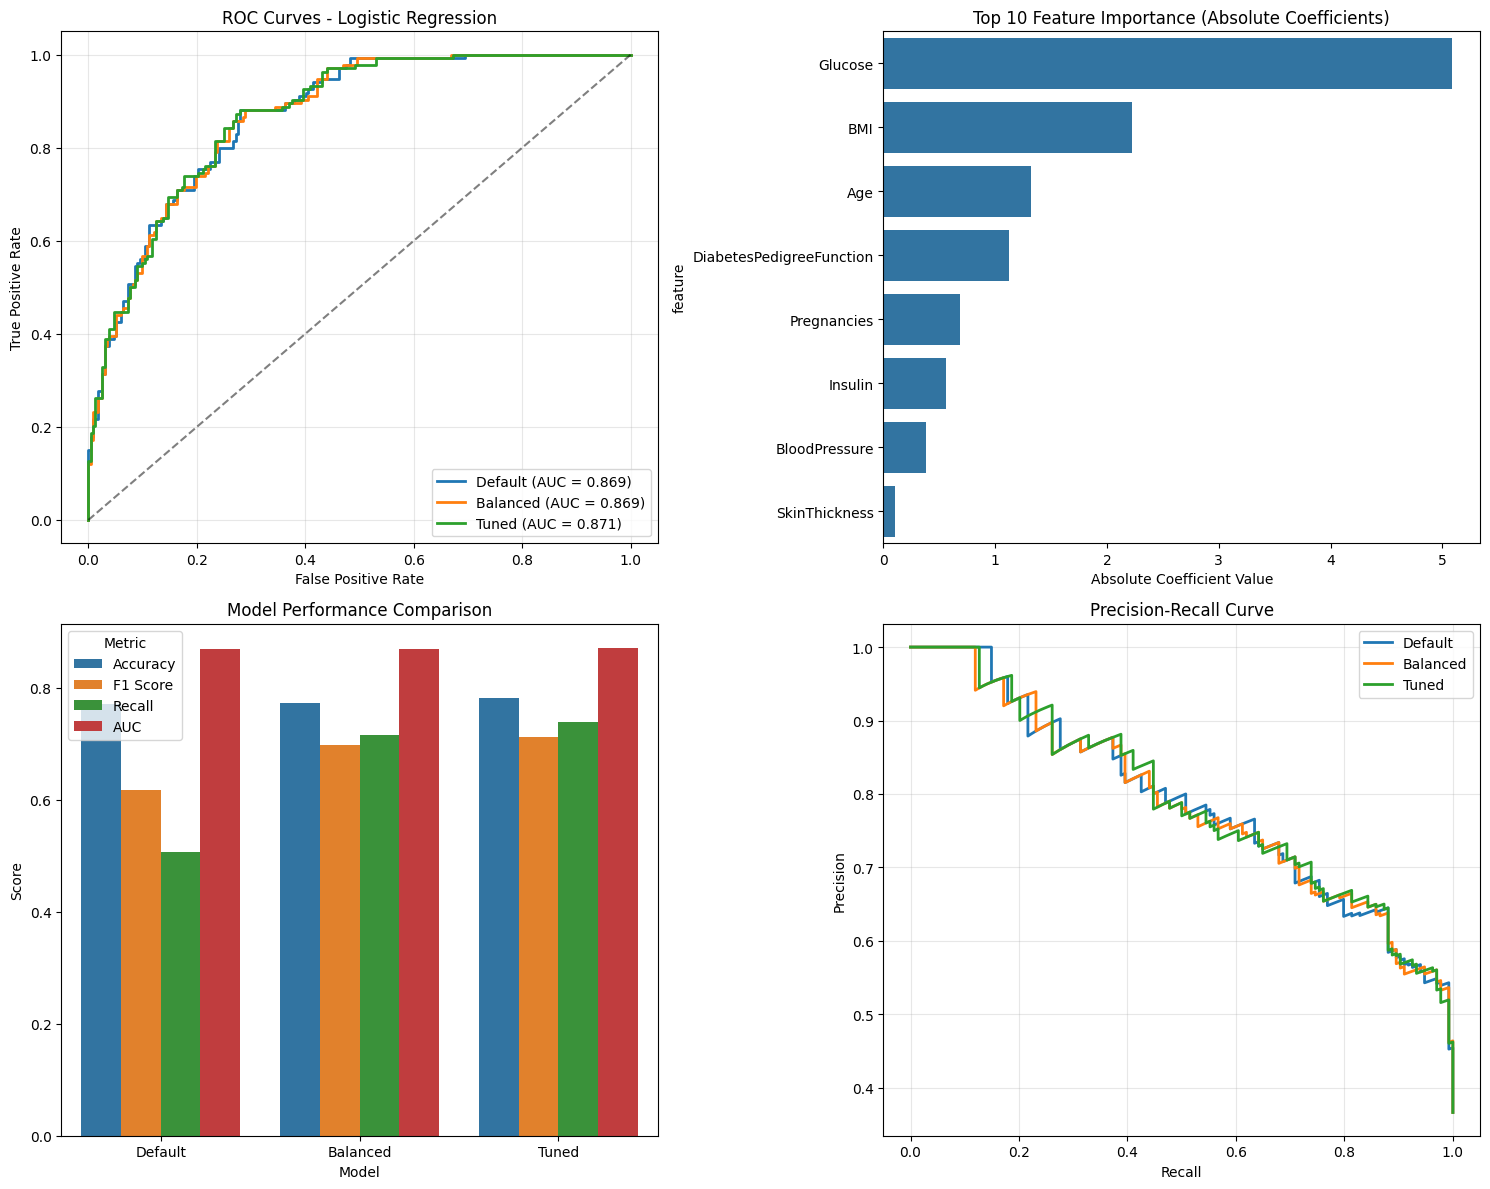


FINAL SUMMARY

  BEST MODELS:
   • By AUC:    Tuned (AUC = 0.8708)
   • By F1:     Tuned (F1 = 0.7122)
   • By Recall: Tuned (Recall = 0.7388)

 KEY INSIGHTS:
   • Class balancing improved recall
   • Hyperparameter tuning improved performance
   • Most important feature: Glucose

  Results saved to 'logistic_regression_analysis.png'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# Load the preprocessed dataset
df = pd.read_csv('final_preprocessed.csv')

# Prepare features (X) and target (y)
X = df.drop(['Id', 'Outcome', 'Age_Binned'], axis=1)
y = df['Outcome']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*60)
print("LOGISTIC REGRESSION COMPREHENSIVE ANALYSIS")
print("="*60)

# 1. Train default Logistic Regression model
print("\n1. TRAINING DEFAULT LOGISTIC REGRESSION...")
logreg_default = LogisticRegression(max_iter=1000, random_state=42)
logreg_default.fit(X_train, y_train)
y_pred_default = logreg_default.predict(X_test)
y_pred_proba_default = logreg_default.predict_proba(X_test)[:, 1]  # Corrected for AUC

# Evaluate default model
acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
prec_default = precision_score(y_test, y_pred_default)
rec_default = recall_score(y_test, y_pred_default)
cm_default = confusion_matrix(y_test, y_pred_default)
auc_default = roc_auc_score(y_test, y_pred_proba_default)

print("✓ Default Model Completed")

# 2. Try Logistic Regression with class weights to handle imbalance
print("\n2. TRAINING BALANCED LOGISTIC REGRESSION...")
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train, y_train)
y_pred_balanced = logreg_balanced.predict(X_test)
y_pred_proba_balanced = logreg_balanced.predict_proba(X_test)[:, 1]

# Evaluate balanced model
acc_balanced = accuracy_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
prec_balanced = precision_score(y_test, y_pred_balanced)
rec_balanced = recall_score(y_test, y_pred_balanced)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

print("✓ Balanced Model Completed")

# 3. Hyperparameter tuning with GridSearchCV
print("\n3. PERFORMING HYPERPARAMETER TUNING...")
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Get best tuned model
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Evaluate tuned model
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("✓ Hyperparameter Tuning Completed")

# 4. Print comprehensive results
print("\n" + "="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)

print("\n  DEFAULT Logistic Regression:")
print(f"   Accuracy:  {acc_default:.4f}")
print(f"   F1 Score:  {f1_default:.4f}")
print(f"   Precision: {prec_default:.4f}")
print(f"   Recall:    {rec_default:.4f}")
print(f"   AUC:       {auc_default:.4f}")
print(f"   Confusion Matrix:\n{cm_default}")

print("\n  BALANCED Logistic Regression:")
print(f"   Accuracy:  {acc_balanced:.4f}")
print(f"   F1 Score:  {f1_balanced:.4f}")
print(f"   Precision: {prec_balanced:.4f}")
print(f"   Recall:    {rec_balanced:.4f}")
print(f"   AUC:       {auc_balanced:.4f}")
print(f"   Confusion Matrix:\n{cm_balanced}")

print(f"\n  TUNED Logistic Regression:")
print(f"   Best Parameters: {grid.best_params_}")
print(f"   Accuracy:  {acc_tuned:.4f}")
print(f"   F1 Score:  {f1_tuned:.4f}")
print(f"   Precision: {prec_tuned:.4f}")
print(f"   Recall:    {rec_tuned:.4f}")
print(f"   AUC:       {auc_tuned:.4f}")
print(f"   Confusion Matrix:\n{cm_tuned}")

# 5. Feature Importance Analysis
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get coefficients from the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': best_model.coef_[0],
    'abs_coefficient': abs(best_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# 6. Cross-Validation Scores
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)

models_cv = {
    'Default': logreg_default,
    'Balanced': logreg_balanced,
    'Tuned': best_model
}

for name, model in models_cv.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{name:8} - CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 7. Visualizations
print("\n" + "="*60)
print("CREATING VISUALIZATIONS...")
print("="*60)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ROC Curve
models_proba = {
    'Default': y_pred_proba_default,
    'Balanced': y_pred_proba_balanced,
    'Tuned': y_pred_proba_tuned
}

for name, y_proba in models_proba.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    axes[0,0].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curves - Logistic Regression')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Feature Importance Plot
sns.barplot(data=feature_importance.head(10), x='abs_coefficient', y='feature', ax=axes[0,1])
axes[0,1].set_title('Top 10 Feature Importance (Absolute Coefficients)')
axes[0,1].set_xlabel('Absolute Coefficient Value')

# Model Comparison Metrics
metrics_comparison = pd.DataFrame({
    'Model': ['Default', 'Balanced', 'Tuned'],
    'Accuracy': [acc_default, acc_balanced, acc_tuned],
    'F1 Score': [f1_default, f1_balanced, f1_tuned],
    'Recall': [rec_default, rec_balanced, rec_tuned],
    'AUC': [auc_default, auc_balanced, auc_tuned]
})

metrics_melted = metrics_comparison.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', ax=axes[1,0])
axes[1,0].set_title('Model Performance Comparison')
axes[1,0].tick_params(axis='x', rotation=0)

# Precision-Recall Curve
for name, y_proba in models_proba.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    axes[1,1].plot(recall, precision, label=f'{name}', linewidth=2)

axes[1,1].set_xlabel('Recall')
axes[1,1].set_ylabel('Precision')
axes[1,1].set_title('Precision-Recall Curve')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('logistic_regression_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Final Summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

# Determine best model
models_summary = [
    {'Name': 'Default', 'AUC': auc_default, 'F1': f1_default, 'Recall': rec_default},
    {'Name': 'Balanced', 'AUC': auc_balanced, 'F1': f1_balanced, 'Recall': rec_balanced},
    {'Name': 'Tuned', 'AUC': auc_tuned, 'F1': f1_tuned, 'Recall': rec_tuned}
]

best_auc = max(models_summary, key=lambda x: x['AUC'])
best_f1 = max(models_summary, key=lambda x: x['F1'])
best_recall = max(models_summary, key=lambda x: x['Recall'])

print(f"\n  BEST MODELS:")
print(f"   • By AUC:    {best_auc['Name']} (AUC = {best_auc['AUC']:.4f})")
print(f"   • By F1:     {best_f1['Name']} (F1 = {best_f1['F1']:.4f})")
print(f"   • By Recall: {best_recall['Name']} (Recall = {best_recall['Recall']:.4f})")

print(f"\n KEY INSIGHTS:")
print(f"   • Class balancing {'improved' if rec_balanced > rec_default else 'did not improve'} recall")
print(f"   • Hyperparameter tuning {'improved' if auc_tuned > auc_default else 'did not improve'} performance")
print(f"   • Most important feature: {feature_importance.iloc[0]['feature']}")

print(f"\n  Results saved to 'logistic_regression_analysis.png'")
print("="*60)


VISUALIZING CONFUSION MATRICES...


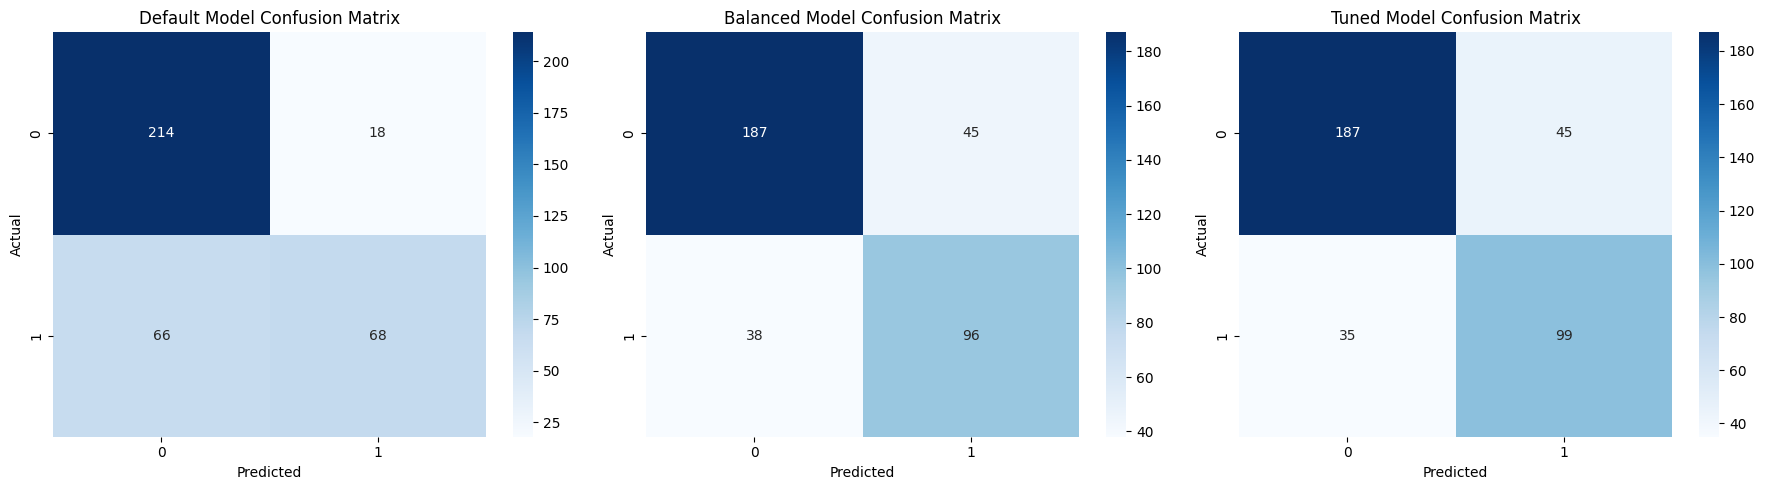

In [3]:
# 7. Visualizations (continued) - Confusion Matrices
print("\n" + "="*60)
print("VISUALIZING CONFUSION MATRICES...")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Default Model Confusion Matrix
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Default Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['0', '1'])
axes[0].set_yticklabels(['0', '1'])

# Balanced Model Confusion Matrix
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Balanced Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['0', '1'])
axes[1].set_yticklabels(['0', '1'])

# Tuned Model Confusion Matrix
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Tuned Model Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['0', '1'])
axes[2].set_yticklabels(['0', '1'])

plt.tight_layout()
plt.show()